![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [118]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Importación librerías
import pandas as pd
import numpy as np

In [122]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

In [123]:
# Visualización datos de entrenamiento
dataTraining.head()

,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27


In [59]:
# Visualización datos de test
dataTesting.head()

,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,6KwkVtXm8OUp2XffN5k7lY,Hillsong Worship,No Other Name,No Other Name,440247,False,0.369,0.598,7,-6.984,1,0.0304,0.00511,0.000000,0.176,0.0466,148.014,4,world-music
1,2dp5I5MJ8bQQHDoFaNRFtX,Internal Rot,Grieving Birth,Failed Organum,93933,False,0.171,0.997,7,-3.586,1,0.1180,0.00521,0.801000,0.420,0.0294,122.223,4,grindcore
2,5avw06usmFkFrPjX8NxC40,Zhoobin Askarieh;Ali Sasha,Noise A Noise 20.4-1,"Save the Trees, Pt. 1",213578,False,0.173,0.803,9,-10.071,0,0.1440,0.61300,0.001910,0.195,0.0887,75.564,3,iranian
3,75hT0hvlESnDJstem0JgyR,Bryan Adams,All I Want For Christmas Is You,Merry Christmas,151387,False,0.683,0.511,6,-5.598,1,0.0279,0.40600,0.000197,0.111,0.5980,109.991,3,rock
4,4bY2oZGA5Br3pTE1Jd1IfY,Nogizaka46,バレッタ TypeD,月の大きさ,236293,False,0.555,0.941,9,-3.294,0,0.0481,0.48400,0.000000,0.266,0.8130,92.487,4,j-idol


In [40]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [42]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()

,Popularity
0,37.454012
1,95.071431
2,73.199394
3,59.865848
4,15.601864


## Unión de data sets

In [45]:
# Unimos los sets de entrenamiento y prueba para el análisis exploratorio
#dataTotal = pd.concat([dataTraining, dataTesting], ignore_index=True)

# Verificamos que se haya unido correctamente
#print(f"Dimensiones del dataset combinado: {dataTotal.shape}")
#dataTotal.info()


## Limpieza de datos

### Eliminación de columnas innecesarias 

In [53]:
# Lista de columnas a eliminar
columnas_a_eliminar = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']

# Eliminar columnas del dataset de train
dataTraining = dataTraining.drop(columns=columnas_a_eliminar, errors='ignore')

# Confirmación
print("Columnas eliminadas correctamente.")
print("Nuevas dimensiones de dataTotal:", dataTraining.shape)


Columnas eliminadas correctamente.
Nuevas dimensiones de dataTotal: (79800, 16)


### Valores faltantes

In [70]:
# Contar valores nulos por columna
missing_values = dataTraining.isnull().sum()
missing_values


duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
popularity          0
dtype: int64

No tenemos faltantes en la base de datos de train

In [76]:
dataTraining.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       79800 non-null  int64  
 1   explicit          79800 non-null  bool   
 2   danceability      79800 non-null  float64
 3   energy            79800 non-null  float64
 4   key               79800 non-null  int64  
 5   loudness          79800 non-null  float64
 6   mode              79800 non-null  int64  
 7   speechiness       79800 non-null  float64
 8   acousticness      79800 non-null  float64
 9   instrumentalness  79800 non-null  float64
 10  liveness          79800 non-null  float64
 11  valence           79800 non-null  float64
 12  tempo             79800 non-null  float64
 13  time_signature    79800 non-null  int64  
 14  track_genre       79800 non-null  object 
 15  popularity        79800 non-null  int64  
dtypes: bool(1), float64(9), int64(5), object

### Histogramas

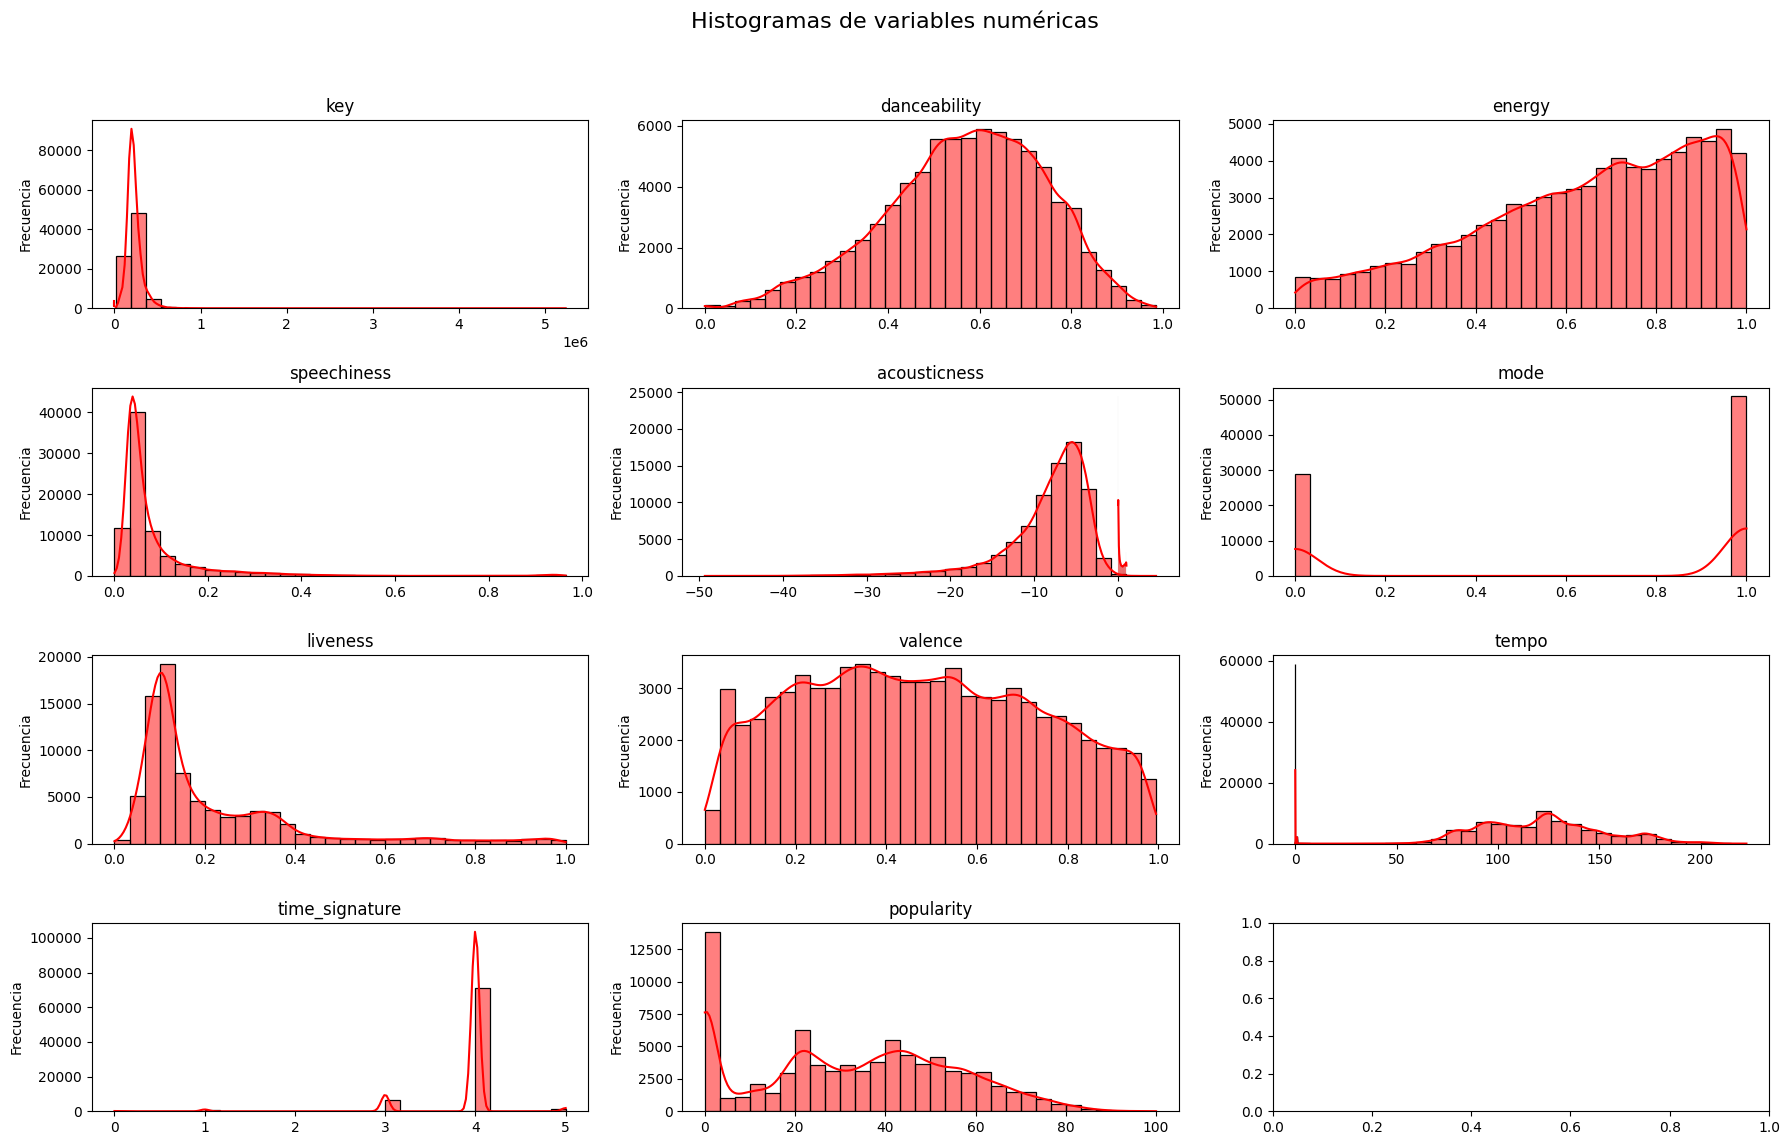

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables numéricas
num_cols = dataTraining.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Crear grilla de histogramas
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
fig.suptitle('Histogramas de variables numéricas', fontsize=16)

for i, col in enumerate(num_cols[:14]):  # Solo los primeros 9 si hay más
    ax = axes[i // 4, i % 3]
    sns.histplot(dataTraining[col], kde=True, ax=ax, bins=30, color='red')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Scatter plots

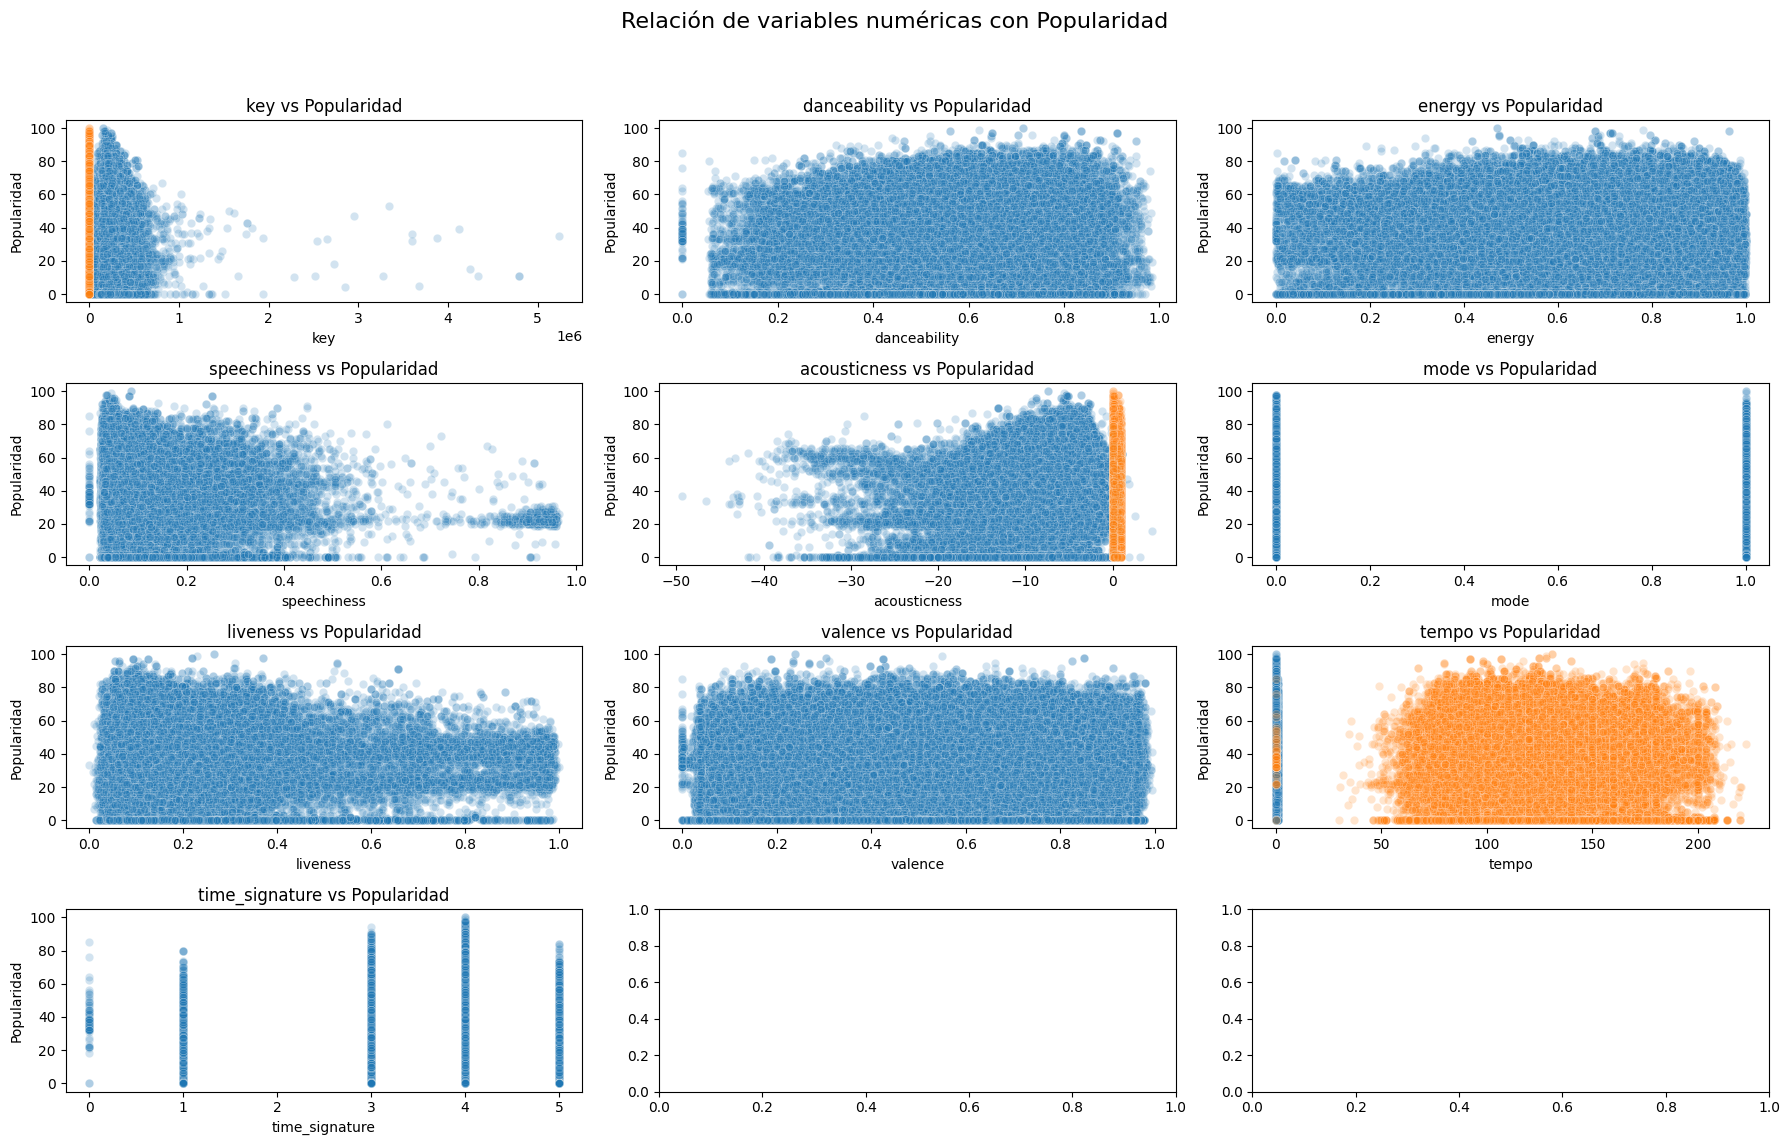

In [102]:
# Crear grilla de scatter plots
fig, axes = plt.subplots(4, 3, figsize=(18, 12))
fig.suptitle('Relación de variables numéricas con Popularidad', fontsize=16)

for i, col in enumerate(num_cols[:14]):
    if col != 'popularity':
        ax = axes[i // 4, i % 3]
        sns.scatterplot(data=dataTraining, x=col, y='popularity', alpha=0.2, ax=ax)
        ax.set_title(f'{col} vs Popularidad')
        ax.set_xlabel(col)
        ax.set_ylabel('Popularidad')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


### Heat Map

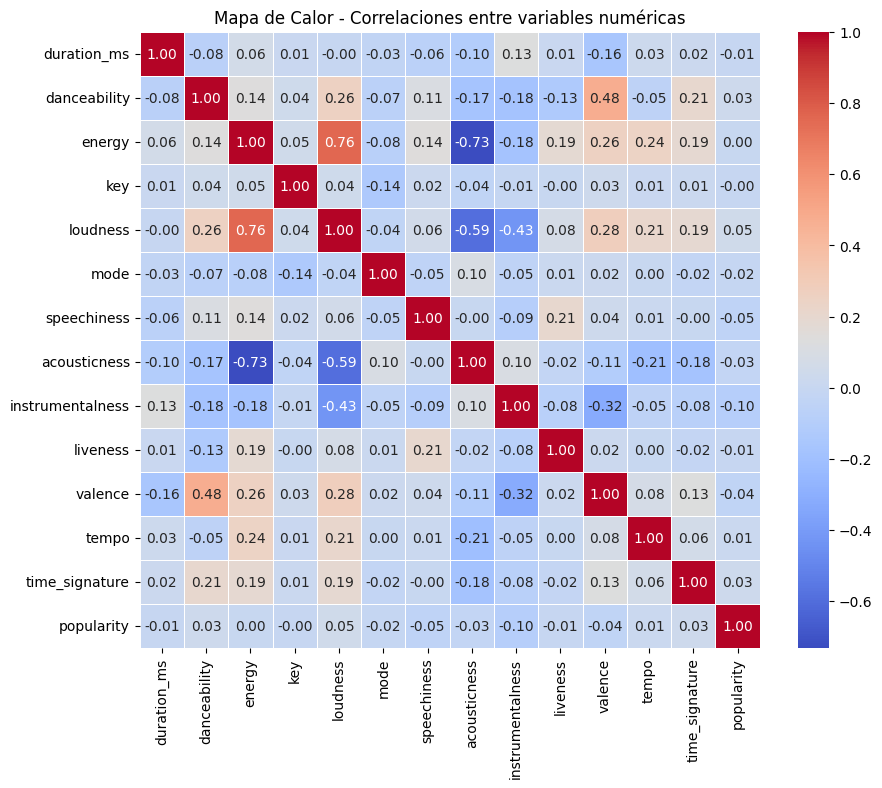

In [113]:
plt.figure(figsize=(10, 8))
corr_matrix = dataTraining[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor - Correlaciones entre variables numéricas')
plt.show()

### Boxplots

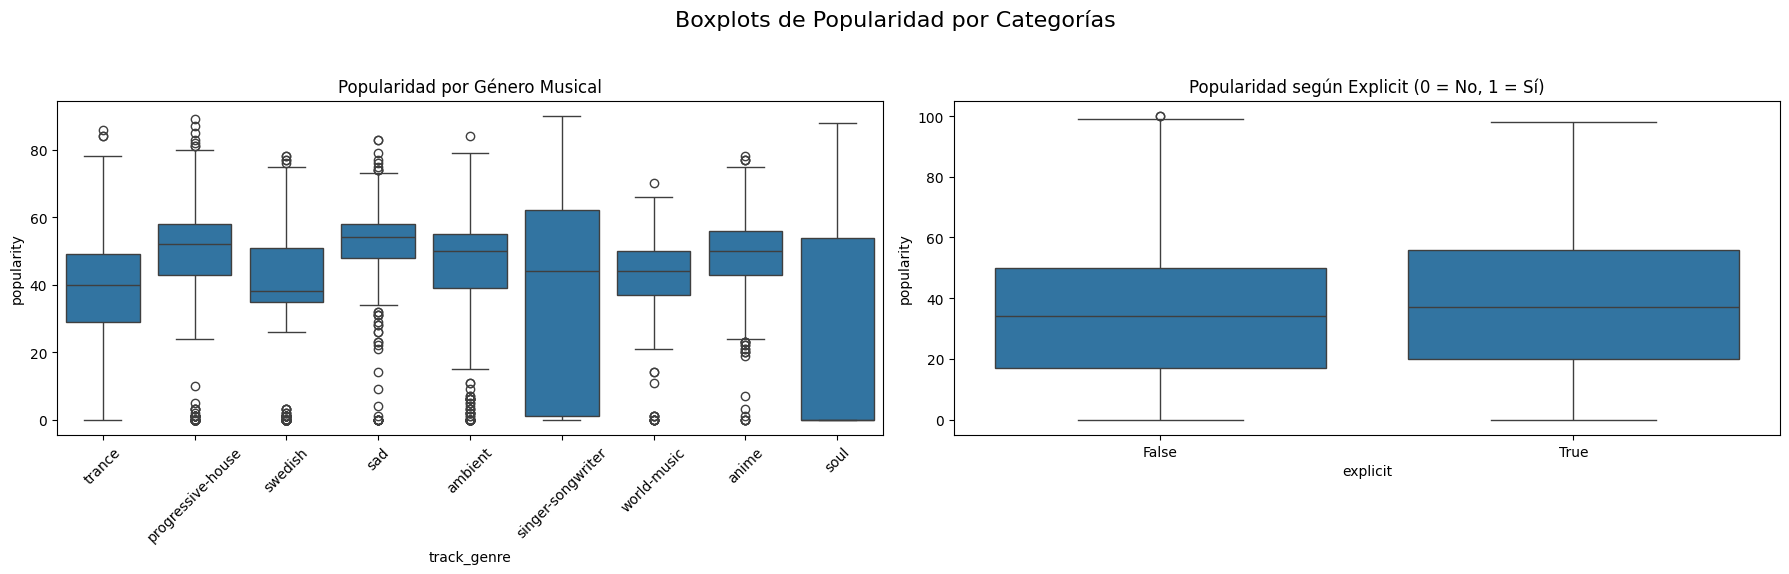

In [116]:
# Filtrar los géneros más frecuentes para mejor visualización
top_genres = dataTraining['track_genre'].value_counts().nlargest(9).index
filtered_data = dataTraining[dataTraining['track_genre'].isin(top_genres)]

fig, axes = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Boxplots de Popularidad por Categorías', fontsize=16)

# Boxplot de track_genre
sns.boxplot(x='track_genre', y='popularity', data=filtered_data, ax=axes[0])
axes[0].set_title('Popularidad por Género Musical')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot de explicit
sns.boxplot(x='explicit', y='popularity', data=dataTraining, ax=axes[1])
axes[1].set_title('Popularidad según Explicit (0 = No, 1 = Sí)')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
